In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import make_circles
from sklearn.cluster import DBSCAN
from sklearn.model_selection import train_test_split

%matplotlib inline

In [2]:
class DensityBasedSpatialClusteringOfApplicationsWithNoise:
    def __init__(self, eps = 0.5, min_points = 5):
        self.eps = eps
        self.min_points = min_points
        self.clusters = None
        
    def _euclidean_distance(self, X1, X2):
        return np.sqrt(np.sum((X1 - X2) ** 2, axis=1))
    
    def _get_core_points_index(self, X):
        core_points_idx = []
        for sample in X:
            distance_from_each_sample = self._euclidean_distance(X, sample)
            num_potenital_core_points = distance_from_each_sample[distance_from_each_sample < self.eps].sum()
            if num_potenital_core_points >= self.min_points:
                core_points_idx.append(True)
        core_points_idx = np.where(core_points_idx)[0]
        
        return core_points_idx

    def _clusters(self, X, core_points_idx):
        clusters = []
        cluster_index = np.ones((len(X), ), dtype = np.int) * -1
        current_idx = 0
        for core_idx in core_points_idx:
            if cluster_index[core_idx] != -1:
                continue
            clusters.append([core_idx])
            cluster_index[core_idx] = current_idx
            new = {core_idx}
            while len(new) > 0:
                point = X[new.pop()]
                indexes = np.where(((self._euclidean_distance(X, point) < self.eps) & (cluster_index == -1)))[0]
                for idx in indexes:
                    if idx not in core_points_idx:
                        continue
                    new.add(idx)
                    clusters[current_idx].append(idx)
                    cluster_index[idx] = current_idx
            current_idx += 1
        
        return clusters
    
    def fit(self, X):
        core_points_idx = self._get_core_points_index(X)
        clusters = self._clusters(X, core_points_idx)
        
        self.clusters = [np.array([X[idx] for idx in cluster]) for cluster in clusters]
        
    def predict(self, X):
        return np.array(self._predict_label(X)) + 1
        
    def _predict_label(self, X):
        labels = []
        for idx in range(0, len(X)):
            dist = []
            for cluster in self.clusters:
                dist.append((self._euclidean_distance(cluster, X[idx]) < self.eps).sum())
            cls = np.argmax(dist)
            labels.append(cls if dist[cls] != 0 else -1)
        
        return labels

In [3]:
X, y = make_circles(n_samples = 500, factor = .3, noise = .005)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=10)

In [4]:
dbscan = DensityBasedSpatialClusteringOfApplicationsWithNoise()
dbscan.fit(X_train)

y_train_pred = dbscan.predict(X_train)
y_test_pred = dbscan.predict(X_test)

np.unique(y_train_pred)

array([1, 2], dtype=int64)

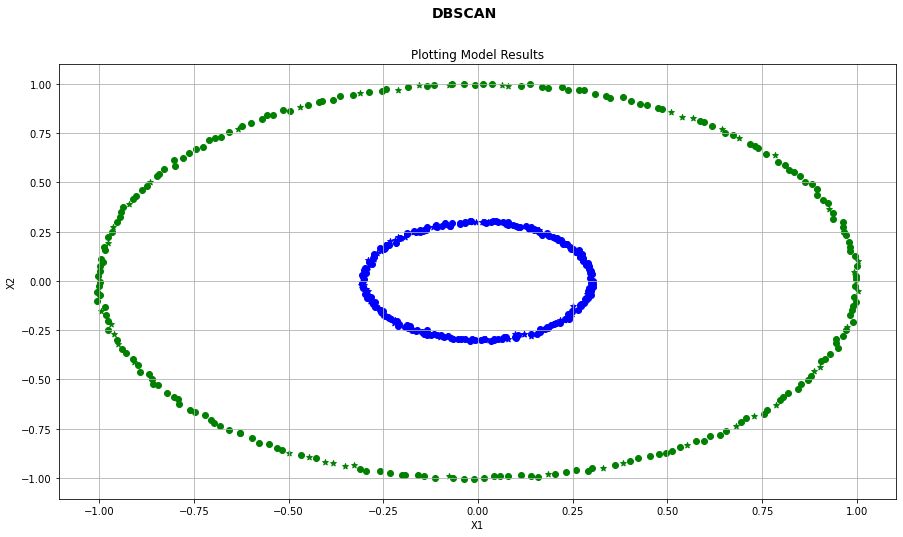

In [5]:
color = ['k', 'b', 'g', 'r', 'y', 'c', 'm', '#eeefff']
fig, ax = plt.subplots(figsize=(15, 8))
fig.suptitle("DBSCAN", fontsize=14, fontweight="bold")
ax.set_title("Plotting Model Results")
ax.set_xlabel("X1")
ax.set_ylabel("X2")
plt.grid(True)
for idx in range(0, len(y_train_pred)):
    plt.scatter(x = X_train[idx][0], y = X_train[idx][1], color = color[y_train_pred[idx]])
for idx in range(0, len(y_test_pred)):
    plt.scatter(x = X_test[idx][0], y = X_test[idx][1], marker = "*" , color = color[y_test_pred[idx]])
    
plt.show()

In [6]:
dbscan2 = DBSCAN()
dbscan2.fit(X_train)

y_train_pred2 = dbscan.predict(X_train)
y_test_pred2 = dbscan.predict(X_test)

np.unique(y_train_pred)

array([1, 2], dtype=int64)

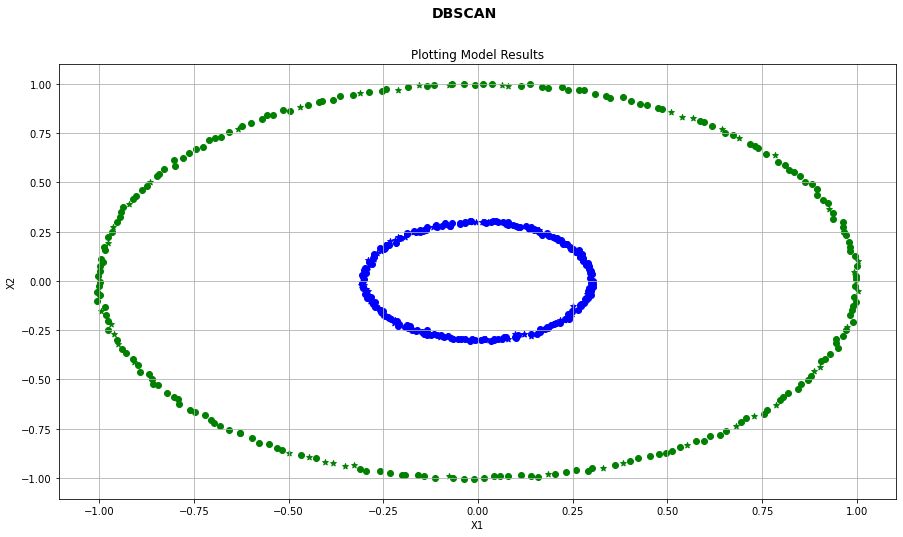

In [7]:
color = ['k', 'b', 'g', 'r', 'y', 'c', 'm', '#eeefff']
fig, ax = plt.subplots(figsize=(15, 8))
fig.suptitle("DBSCAN", fontsize=14, fontweight="bold")
ax.set_title("Plotting Model Results")
ax.set_xlabel("X1")
ax.set_ylabel("X2")
plt.grid(True)
for idx in range(0, len(y_train_pred)):
    plt.scatter(x = X_train[idx][0], y = X_train[idx][1], color = color[y_train_pred2[idx]])
for idx in range(0, len(y_test_pred)):
    plt.scatter(x = X_test[idx][0], y = X_test[idx][1], marker = "*" , color = color[y_test_pred2[idx]])
    
plt.show()